# Data 606 Capstone: Fraud Detection in Financial Transactions, an Anamoly Detection Approach 

### Importing libraries necessary for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support

### Reading the data set and saving it into df.

In [2]:
file_path = '/Users/phani/Downloads/Financial_Dataset_Capstone.csv'
df = pd.read_csv(file_path)

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


* With the above function we can see the statistics of the given DataFrame particularly for the Numerical Features.
* It can help us identify potential outliers, understand the distribution of our data, and decide on appropriate data preprocessing steps or transformations.

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Exploratory Data Analysis

In [8]:
print('No. of duplicates are : ', df.duplicated().sum())

No. of duplicates are :  0


* From the above result, we can clearly say that the data set doesn't have any duplicates. There areno null values also.
* There is no need for the data cleaning step.

In [9]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

* Our data is highly imbalanced with 6.3m rows in Non-Fradulent category and 8213 observations only.

In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

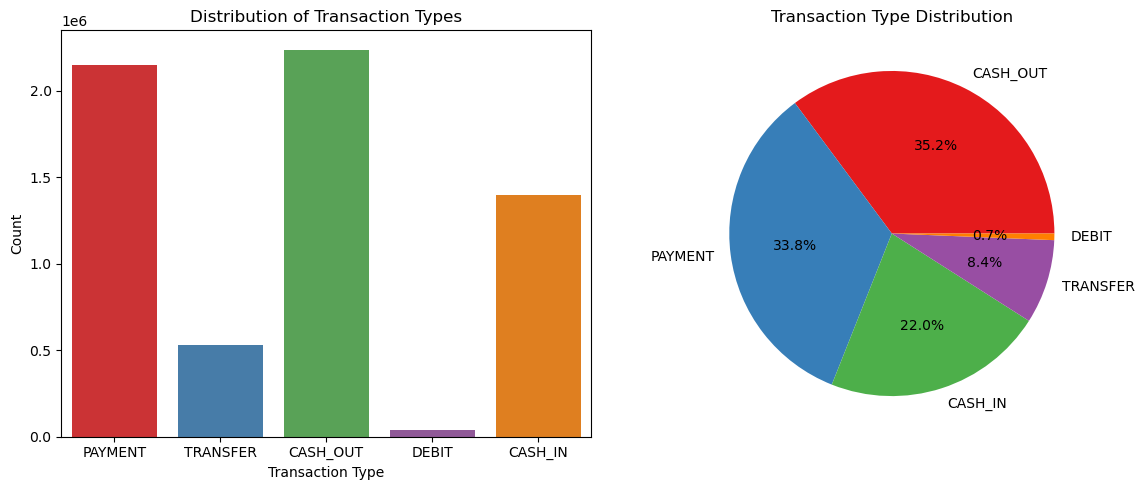

In [11]:
fraud_counts = df['isFraud'].value_counts()
transaction_type_counts = df['type'].value_counts()

# Creating a figure.
plt.figure(figsize=(12, 5))

# Subplot 1: Countplot for Transaction Types
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type', palette='Set1')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Subplot 2: Pie Chart for Transaction Types
plt.subplot(1, 2, 2)
type_counts = df['type'].value_counts()
type_labels = type_counts.index
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Transaction Type Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

The data is highly imbalanced as the fraud transactions are just 1% when compare and our class variable contains data which is highly skewed towards the flag value 0, which would indeed affect any models we might train on this dataset.

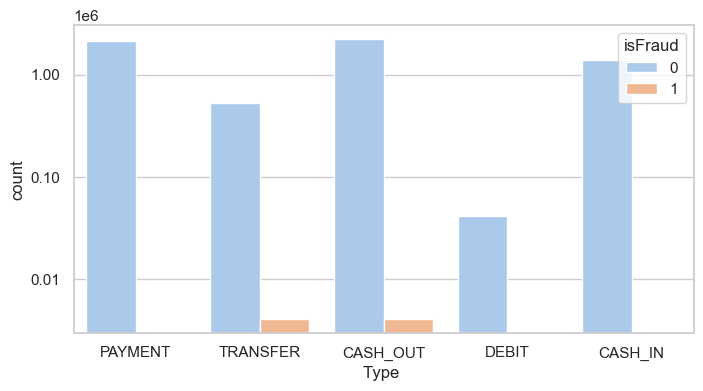

In [12]:
import matplotlib.ticker as mticker
def countplot_eda(df):
    sns.set_style('whitegrid')
    sns.set_context('notebook')
    plt.figure(figsize=(8, 4))
    counplot = sns.countplot(data=df, x='type', hue='isFraud',palette= "pastel")
    counplot.set_xlabel('Type ')
    counplot.set_ylabel(f'count')
    counplot.set_yscale('log')
    counplot.yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.show()

countplot_eda(df)

In [13]:
categories_to_remove = ['CASH_IN', 'PAYMENT', 'DEBIT']
old_df = df
df = df[~df['type'].isin(categories_to_remove)]

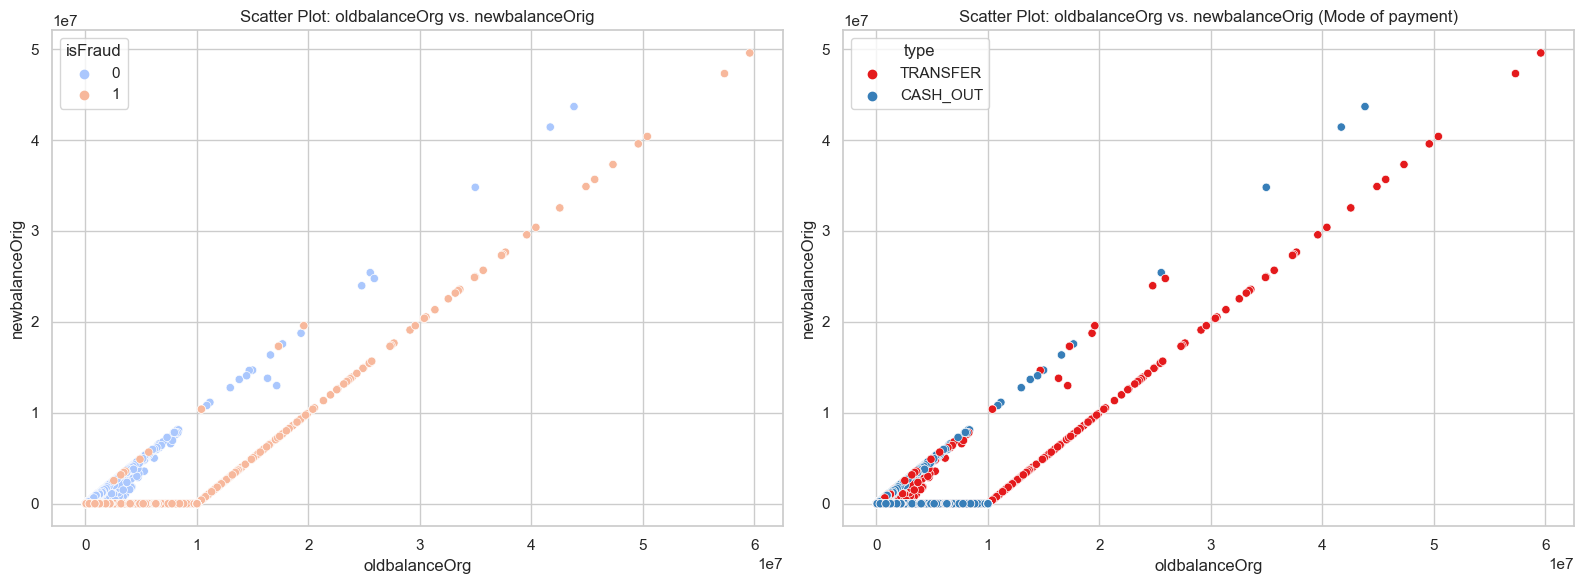

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Scatter plot for 'oldbalanceOrg' vs. 'newbalanceOrig' colored by 'isFraud'
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', palette='coolwarm', ax=axes[0])
axes[0].set_title('Plot ')
axes[0].set_title('Scatter Plot: oldbalanceOrg vs. newbalanceOrig')
axes[0].set_xlabel('oldbalanceOrg')
axes[0].set_ylabel('newbalanceOrig')

# Second subplot: Scatter plot for 'oldbalanceOrg' vs. 'newbalanceOrig' colored by 'type'
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='type', palette='Set1', ax=axes[1])
axes[1].set_title('Scatter Plot: oldbalanceOrg vs. newbalanceOrig (Mode of payment)')
axes[1].set_xlabel('oldbalanceOrg')
axes[1].set_ylabel('newbalanceOrig')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

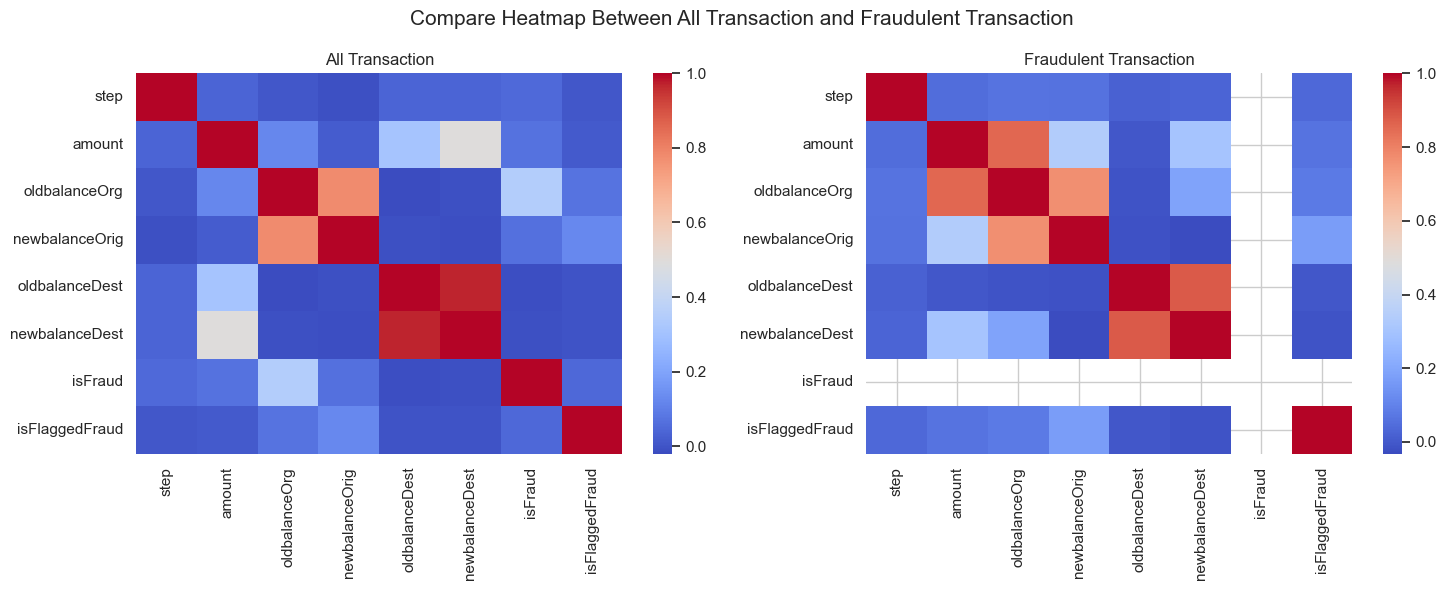

In [15]:
temp = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for 'data' dataframe
corr_data = temp.corr()

# Compute the correlation matrix for 'fraudulent_transaction' dataframe
fraudulent_transaction = temp.loc[df['isFraud']==1]
corr_fraudulent = fraudulent_transaction.corr()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for 'data' dataframe
sns.heatmap(corr_data, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[0])
ax[0].set_title("All Transaction", fontsize=12)

# Heatmap for 'fraudulent_transaction' dataframe
sns.heatmap(corr_fraudulent, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[1])
ax[1].set_title("Fraudulent Transaction", fontsize=12)

fig.suptitle('Compare Heatmap Between All Transaction and Fraudulent Transaction', fontsize=15)

plt.tight_layout()
plt.show()

There's a notable correlation between 'amount' and 'oldbalanceOrg' that distinguishes between all transactions and fraudulent transactions. This is typical for fraud because criminals are likely intending to empty the target's account regardless of the savings balance.

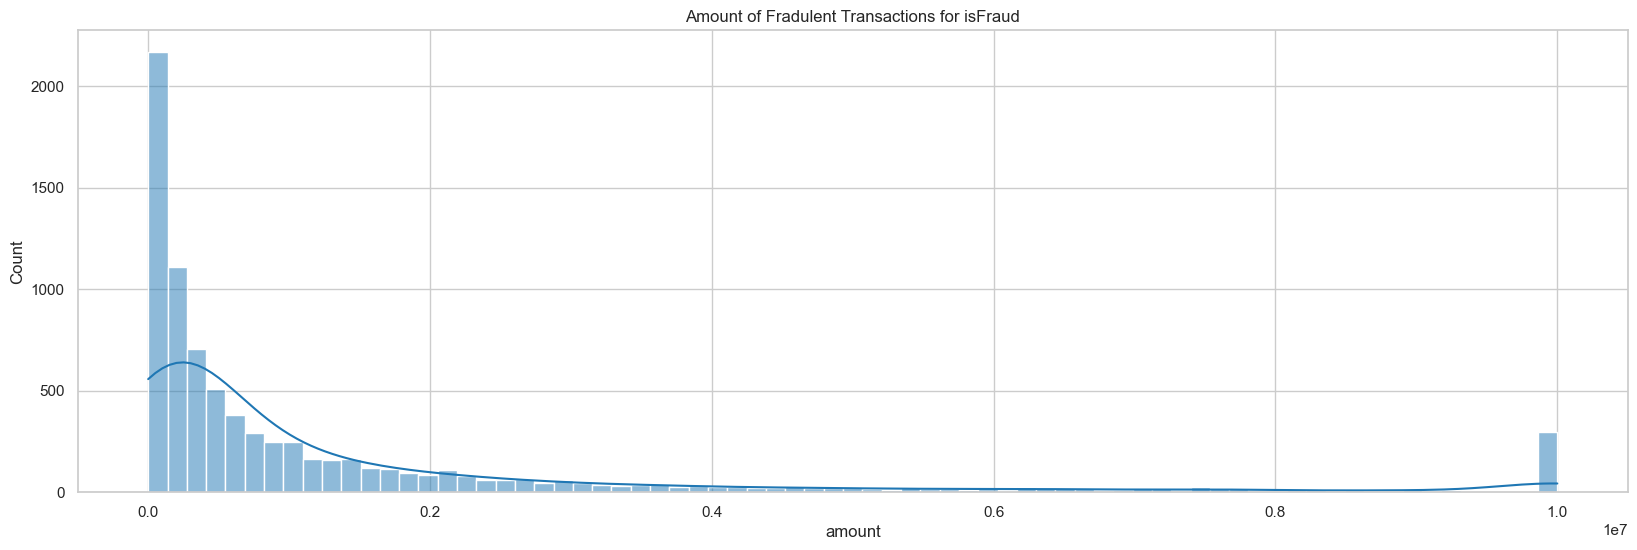

In [16]:
figure = plt.subplots(figsize = (20, 6))
ax = sns.histplot(data=df[df['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')
plt.show()

* The distribution of the overall transaction amount is right-skewed, ranging between 0-10 million.
* The distribution of fraudulent transaction amounts is also right-skewed, ranging between 0-10 million, with a spike at 10 million. This suggests that all fraudulent transactions do not exceed 10 million per transfer. This might be due to reaching the maximum transfer limit of the bank.

# Data Preprocessing

* Before diving into model training, it's essential to preprocess the data to ensure it's in the right format for our machine learning algorithms. 
### In this section:

* We drop the unused columns.
* Convert data types for isFraud and isFlaggedFraud to boolean type.
* Encode the categorical columns using OneHotEncoder.
* Further divide the data into training and testing sets. Stratified sampling is used to ensure that both sets have a similar distribution of the target variable.

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [18]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [19]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


In [20]:
# covert data type of some columns
df['isFraud'] = df['isFraud'].astype(bool)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         bool   
 8   isFlaggedFraud  bool   
dtypes: bool(2), float64(5), int64(1), object(1)
memory usage: 174.4+ MB



### OneHotEncoder
* If we Label Encoding categorical variable (in this case 'type') as integer e.g. (0,1,2,..) algorithms might assume an ordinal relationhsip between the categories. For example

* **PAYMENT = 0**
* **TRANSFER = 1**
* **CASH_OUT = 2**
* **DEBIT = 3**
* **CASH_IN = 4**
* This might lead the model to assume that DEBIT(3) somehow greater than TRANSFER(2), which doesn't make sense. OneHotEncoding avoids this problem.
* Instead of hard coding a single column, we will be defining a pipeline which will split the categorical features and numerical features based on their datatypes then OneHotEncode the categorical and scale the numerical data using standardscalar which were defined in a preprocessing step.

### Pipeline
* A pipeline is a way to streamline a lot of the routine processes, making it easier to combine different steps of a machine learning workflow. A typical machine learning pipeline consists of three main stages:

#### Data Preprocessing:

* Data Cleaning: Handling missing values, outliers, and other inconsistencies in the data.
Feature Scaling: Standardizing or normalizing features to bring them to a similar scale.
Feature Engineering: Creating new features from existing ones or transforming features to improve model performance.
One-Hot Encoding or Label Encoding: Handling categorical variables.
#### Model Training:

* Choosing a Model: Selecting a machine learning algorithm based on the nature of the problem (classification, regression, etc.) and the characteristics of the data.

* Training the Model: Using training data to teach the model the patterns in the data.
#### Model Evaluation:

* Testing and Validation: Assessing the model's performance on data it hasn't seen before.

* Hyperparameter Tuning: Adjusting the hyperparameters of the model to improve its performance.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your original dataset
X = df.drop(columns=['isFraud'])
y = df['isFraud']


# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9983341815832314
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.92      0.48      0.63      1643

    accuracy                           1.00    554082
   macro avg       0.96      0.74      0.82    554082
weighted avg       1.00      1.00      1.00    554082



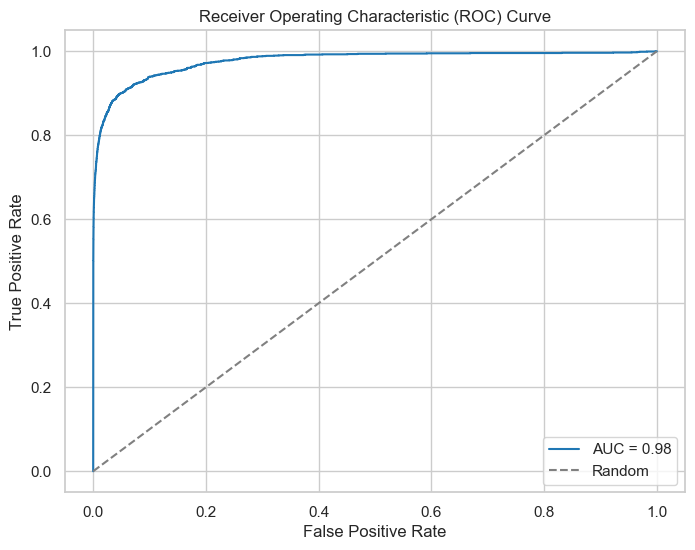

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

* Here are the results from the logistic regression classifier trained on the balanced dataset:

* Accuracy: 99.83%
* ROC AUC: 0.98
* Precision (for Fraudulent transactions): 0.92
* Recall (for Fraudulent transactions): 0.48
* F1-score (for Fraudulent transactions): 0.63
- Logistic Regression achieves high accuracy and ROC AUC, which means the model's overall reliability in classifying transactions is good. However, in fraud detection, where fraudulent transactions are intermingled with non-fraudulent ones, the balance between precision and recall often carries more weight than mere accuracy.

- The recall is 0.48, indicating that the model can detect 48% of fraudulent activities. This is not ideal. In fraud detection, a high recall is critical to ensure that fewer fraudulent transactions go undetected.

- The precision is 0.92, which means that for every 100 transactions the model predicts as fraudulent, 92 of them are genuinely fraudulent. A lower precision implies that a higher number of legitimate transactions are incorrectly flagged. We have a good value of precision but the recall is lower so need to have a balance between these two to get a good performance in the model. 

- The F1-score is reflecting the trade-off in fraud detection between capturing real fraudulent activities and minimizing false alarms. Since this is baseline model, a score of 0.6 indicates that there is room for improvement.

# Random Foresr Classifier

Random Forest - Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.98      0.78      0.86      1643

    accuracy                           1.00    554082
   macro avg       0.99      0.89      0.93    554082
weighted avg       1.00      1.00      1.00    554082

Random Forest - Accuracy: 1.00


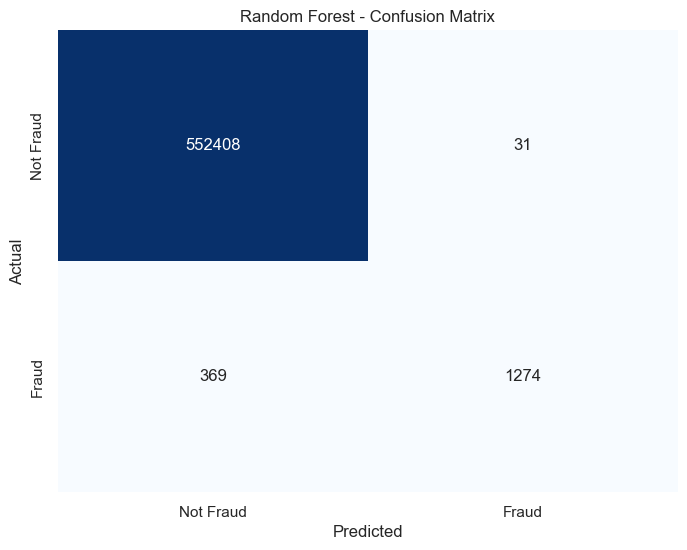

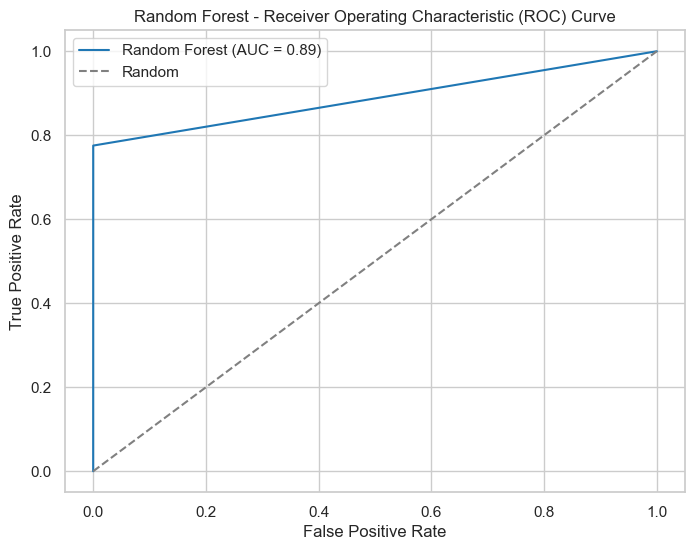

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Create pipeline for Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)
y_rf_pred = rf_pipeline.predict(X_test)

# Print classification report
classification_rep_rf = classification_report(y_test, y_rf_pred)
print("Random Forest - Classification Report:\n", classification_rep_rf)

# Print accuracy
accuracy_rf = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Plot ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_rf_pred)
rf_auc = roc_auc_score(y_test, y_rf_pred)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


* Here are the results from the Random Forest classifier trained on the balanced dataset:

* Accuracy: 89.83%
* ROC AUC: 0.89
* Precision (for Fraudulent transactions): 0.98
* Recall (for Fraudulent transactions): 0.78
* F1-score (for Fraudulent transactions): 0.86
- Random Forest achieves good accuracy and ROC AUC, which means the model's overall reliability in classifying transactions is good. However, in fraud detection, where fraudulent transactions are intermingled with non-fraudulent ones, the balance between precision and recall often carries more weight than mere accuracy.

- The recall is 0.78, indicating that the model can detect 78% of fraudulent activities. This is good. In fraud detection, a high recall is critical to ensure that fewer fraudulent transactions go undetected.

- The precision is 0.98, which means that for every 100 transactions the model predicts as fraudulent, 98 of them are genuinely fraudulent. A lower precision implies that a higher number of legitimate transactions are incorrectly flagged. We have a good value of precision but the recall is lower so need to have a balance between these two to get a good performance in the model. 

- The F1-score is reflecting the trade-off in fraud detection between capturing real fraudulent activities and minimizing false alarms. Since this is baseline model, a score of 0.8 indicates that the model is performing good..

In [39]:
from sklearn.ensemble import IsolationForest

# Combine preprocessor with Isolation Forest
iso_forest_pipeline = make_imb_pipeline(
    preprocessor,
    IsolationForest(random_state=42, contamination='auto')
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the Isolation Forest model
iso_forest_pipeline.fit(X_train)

# Predict anomalies (outliers)
y_iso_forest_pred = iso_forest_pipeline.predict(X_test)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_iso_forest_pred_binary = (y_iso_forest_pred == 1)

# Print classification report
classification_rep_iso_forest = classification_report(y_test, y_iso_forest_pred_binary)
print("Classification Report (Isolation Forest):\n", classification_rep_iso_forest)


Classification Report (Isolation Forest):
               precision    recall  f1-score   support

       False       0.98      0.13      0.22    552439
        True       0.00      0.26      0.00      1643

    accuracy                           0.13    554082
   macro avg       0.49      0.19      0.11    554082
weighted avg       0.98      0.13      0.22    554082



In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm_pipeline = make_pipeline(
    preprocessor,
    SVC(kernel='linear', random_state=42)
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_svm_pred = svm_pipeline.predict(X_test)

# Print classification report
classification_rep_svm = classification_report(y_test, y_svm_pred)
print("Classification Report (SVM):\n", classification_rep_svm)

Classification Report (SVM):
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.97      0.40      0.57      1643

    accuracy                           1.00    554082
   macro avg       0.99      0.70      0.79    554082
weighted avg       1.00      1.00      1.00    554082



# Over Sampling and Under Sampling
### Class imbalance in Classification

* There are two ways to balance classes - by increasing the smaller class with random duplication, or by decreasing the larger class by randomly removing observations.

#### SMOTE | Overcoming Class Imbalance Problem Using SMOTE

* SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.



In [25]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your original dataset
X = df.drop(columns=['isFraud'])
y = df['isFraud']


# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create imbalanced pipeline with SMOTE and Logistic Regression
logreg_pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    LogisticRegression(random_state=42)
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Logistic Regression model with SMOTE
logreg_pipeline.fit(X_train, y_train)
y_logreg_pred = logreg_pipeline.predict_proba(X_test)[:, 1]


In [26]:
# Calculate predictions
y_logreg_pred = logreg_pipeline.predict(X_test)

# Print classification report
classification_rep = classification_report(y_test, y_logreg_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.94      0.97    552439
        True       0.04      0.89      0.08      1643

    accuracy                           0.94    554082
   macro avg       0.52      0.92      0.53    554082
weighted avg       1.00      0.94      0.97    554082



# ROC Curve

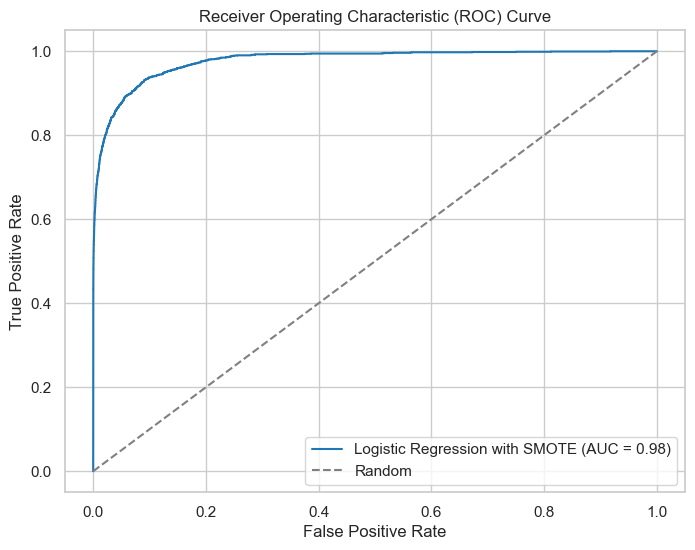

In [27]:
# Get predicted probabilities for positive class
y_logreg_prob = logreg_pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_logreg_prob)

# Calculate the AUC (Area Under the Curve)
auc_logreg = roc_auc_score(y_test, y_logreg_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression with SMOTE (AUC = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Random Forest

In [28]:
# Create imbalanced pipeline with SMOTE and Logistic Regression
randfor_pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    RandomForestClassifier(random_state=42)
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest Classifier model with SMOTE
randfor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [29]:
# Calculate predictions
y_randfor_pred = randfor_pipeline.predict(X_test)

# Pritn Accuracy
accuracy_rf = accuracy_score(y_test, y_randfor_pred)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")

# Print classification report
classification_rep = classification_report(y_test, y_randfor_pred)

print("Classification Report:\n", classification_rep)

Random Forest - Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.66      0.95      0.78      1643

    accuracy                           1.00    554082
   macro avg       0.83      0.97      0.89    554082
weighted avg       1.00      1.00      1.00    554082



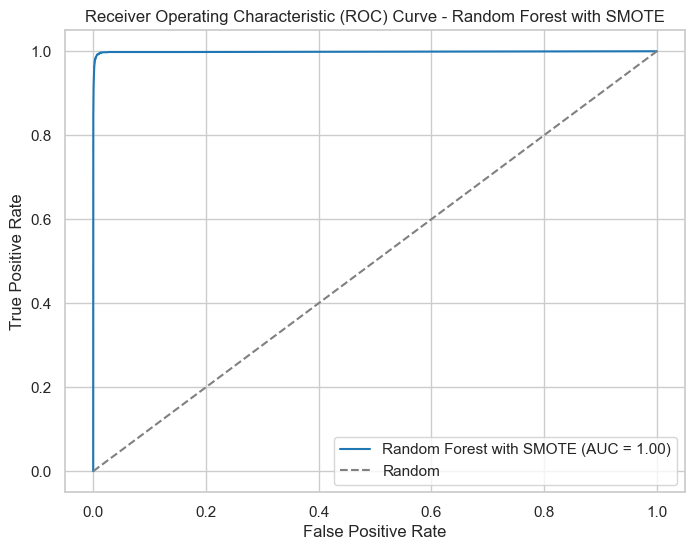

In [30]:
y_randfor_prob = randfor_pipeline.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
fpr_randfor, tpr_randfor, thresholds_randfor = roc_curve(y_test, y_randfor_prob)

# Calculate the AUC (Area Under the Curve)
auc_randfor = roc_auc_score(y_test, y_randfor_prob)

# Plot the ROC curve for Random Forest with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(fpr_randfor, tpr_randfor, label=f'Random Forest with SMOTE (AUC = {auc_randfor:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest with SMOTE')
plt.legend()
plt.show()

* Using SMOTE has made the Random Forest classifier more sensitive to the minority class (in this case 'Fraud' = 1), leading to a significant increase in recall for fraudulent transactions. This model is now better at catching most of the fraudulent activities. However, this comes at the cost of reduced precision. The trade-off between Precision and Recall has now become clearer.

# K nearest neighbour

KNN - Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.91      0.68      0.78      1643

    accuracy                           1.00    554082
   macro avg       0.95      0.84      0.89    554082
weighted avg       1.00      1.00      1.00    554082

KNN - Accuracy: 1.00


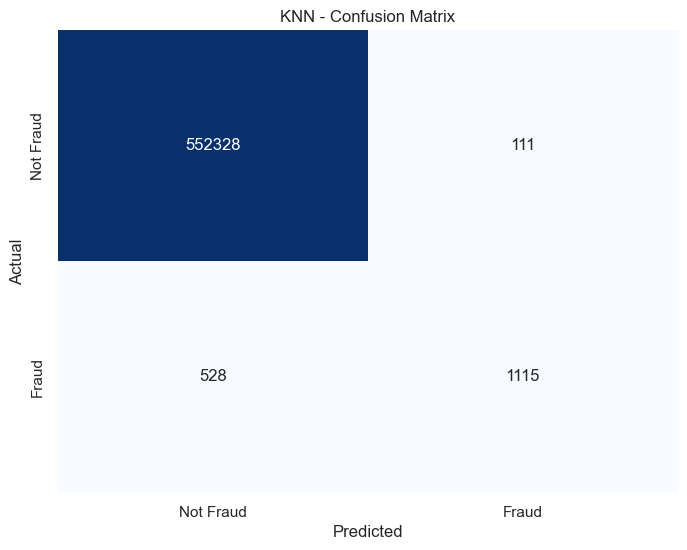

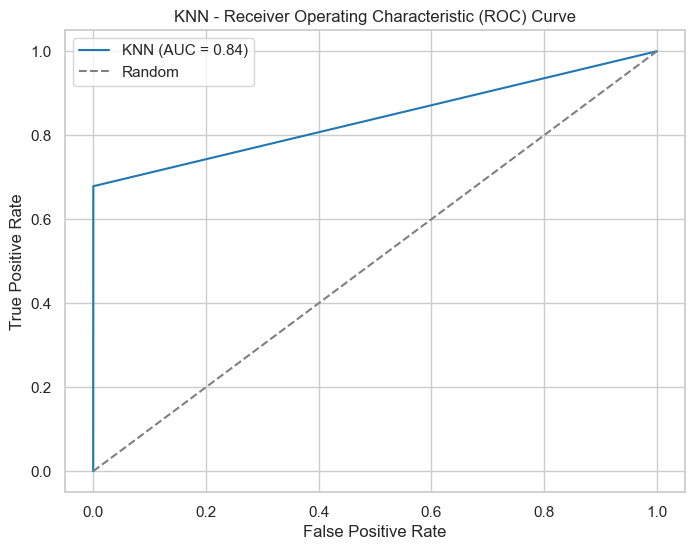

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create pipeline for KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)
y_knn_pred = knn_pipeline.predict(X_test)

# Print classification report
classification_rep_knn = classification_report(y_test, y_knn_pred)
print("KNN - Classification Report:\n", classification_rep_knn)

# Print accuracy
accuracy_knn = accuracy_score(y_test, y_knn_pred)
print(f"KNN - Accuracy: {accuracy_knn:.2f}")

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN - Confusion Matrix')
plt.show()

# Plot ROC curve for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_knn_pred)
knn_auc = roc_auc_score(y_test, y_knn_pred)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Hyper Parameter Tuning

* Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are configuration settings that are not learned from the data but are set prior to the training process. They can significantly impact the performance of a machine learning model.

* The process of hyperparameter tuning involves searching across a predefined hyperparameter space, training and evaluating the model with different combinations of hyperparameters, and selecting the set of hyperparameters that results in the best model performance.

* There are different techniques and we will be using GridSearch for both the models
### Grid Search:
* This involves exhaustively searching through a manually specified subset of the hyperparameter space. It evaluates the model performance for all possible combinations of hyperparameters within the specified range.



## K Nearest Neighbour

Best Parameters for KNN: {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best KNN - Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.93      0.71      0.81      1643

    accuracy                           1.00    554082
   macro avg       0.97      0.86      0.90    554082
weighted avg       1.00      1.00      1.00    554082

Best KNN - Accuracy: 1.00


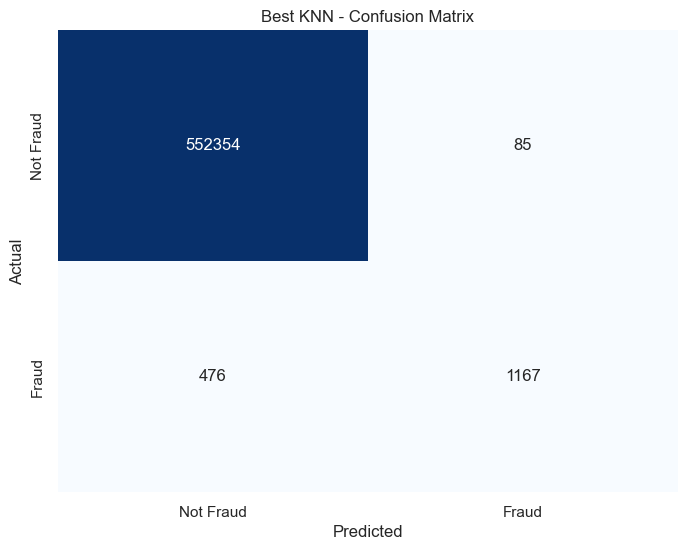

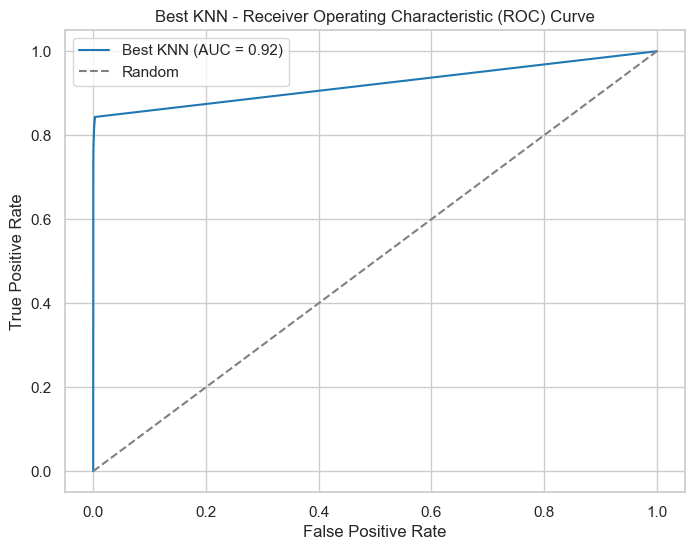

In [34]:
# Define the parameter grid for KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

# Create pipeline for KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Set up GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and estimator
best_params_knn = grid_search_knn.best_params_
best_estimator_knn = grid_search_knn.best_estimator_

# Print the best parameters
print("Best Parameters for KNN:", best_params_knn)

# Print the classification report, accuracy, confusion matrix, and ROC curve for the best KNN model
y_best_knn_pred = best_estimator_knn.predict(X_test)
classification_rep_best_knn = classification_report(y_test, y_best_knn_pred)
print("Best KNN - Classification Report:\n", classification_rep_best_knn)

accuracy_best_knn = accuracy_score(y_test, y_best_knn_pred)
print(f"Best KNN - Accuracy: {accuracy_best_knn:.2f}")

cm_best_knn = confusion_matrix(y_test, y_best_knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best KNN - Confusion Matrix')
plt.show()

# Plot ROC curve for the best KNN
best_knn_fpr, best_knn_tpr, _ = roc_curve(y_test, best_estimator_knn.predict_proba(X_test)[:, 1])
best_knn_auc = roc_auc_score(y_test, best_estimator_knn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(best_knn_fpr, best_knn_tpr, label=f'Best KNN (AUC = {best_knn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best KNN - Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust as needed
    'classifier__penalty': ['l2'],  # Use 'l2' penalty for 'lbfgs' solver
    'classifier__solver': ['lbfgs']  # Use 'lbfgs' solver
}

# Set up GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(pipeline, param_grid_logreg, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters and estimator
best_params_logreg = grid_search_logreg.best_params_
best_estimator_logreg = grid_search_logreg.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", best_params_logreg)

# Print the classification report and accuracy for the best Logistic Regression model
y_best_logreg_pred = best_estimator_logreg.predict(X_test)
classification_rep_best_logreg = classification_report(y_test, y_best_logreg_pred)
print("Best Logistic Regression - Classification Report:\n", classification_rep_best_logreg)

accuracy_best_logreg = accuracy_score(y_test, y_best_logreg_pred)
print(f"Best Logistic Regression - Accuracy: {accuracy_best_logreg:.2f}")


Best Parameters for Logistic Regression: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Logistic Regression - Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.91      0.49      0.64      1643

    accuracy                           1.00    554082
   macro avg       0.95      0.75      0.82    554082
weighted avg       1.00      1.00      1.00    554082

Best Logistic Regression - Accuracy: 1.00


* There is no significant change in the accuracy and the precision, recall and f1-score even after implementing the hyperparameter tuning for the logistic regression.

# Results and Comparision

In [52]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression without SMOTE
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Logistic Regression with SMOTE
logreg_smote_pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    LogisticRegression(random_state=42)
)

# Random Forest without SMOTE
randfor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Random Forest with SMOTE
randfor_smote_pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    RandomForestClassifier(random_state=42)
)

# List of models for iteration
models = [
    ("Logistic Regression", logreg_pipeline),
    ("Logistic Regression with SMOTE", logreg_smote_pipeline),
    ("Random Forest", randfor_pipeline),
    ("Random Forest with SMOTE", randfor_smote_pipeline)
]

# Results dictionary to store metrics
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import time

# Results dictionary to store metrics and running time
results = {}

# Iterate over models
for name, model in models:
    start_time = time.time()  # Record start time
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    end_time = time.time()  # Record end time
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results[name] = {
        "Running Time": end_time - start_time,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Precision": classification_rep['True']['precision'],
        "Recall": classification_rep['True']['recall'],
        "F1-Score": classification_rep['True']['f1-score']
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T
results_df.index.name = "Model"

# Display the DataFrame
print(results_df)


                                Running Time  Accuracy   ROC-AUC  Precision  \
Model                                                                         
Logistic Regression                 4.881746  0.998334  0.977323   0.918605   
Logistic Regression with SMOTE      6.143055  0.941418  0.977384   0.043521   
Random Forest                     382.230634  0.999278  0.993147   0.976245   
Random Forest with SMOTE          651.064658  0.998372  0.998660   0.655607   

                                  Recall  F1-Score  
Model                                               
Logistic Regression             0.480828  0.631243  
Logistic Regression with SMOTE  0.894096  0.083001  
Random Forest                   0.775411  0.864315  
Random Forest with SMOTE        0.950091  0.775845  


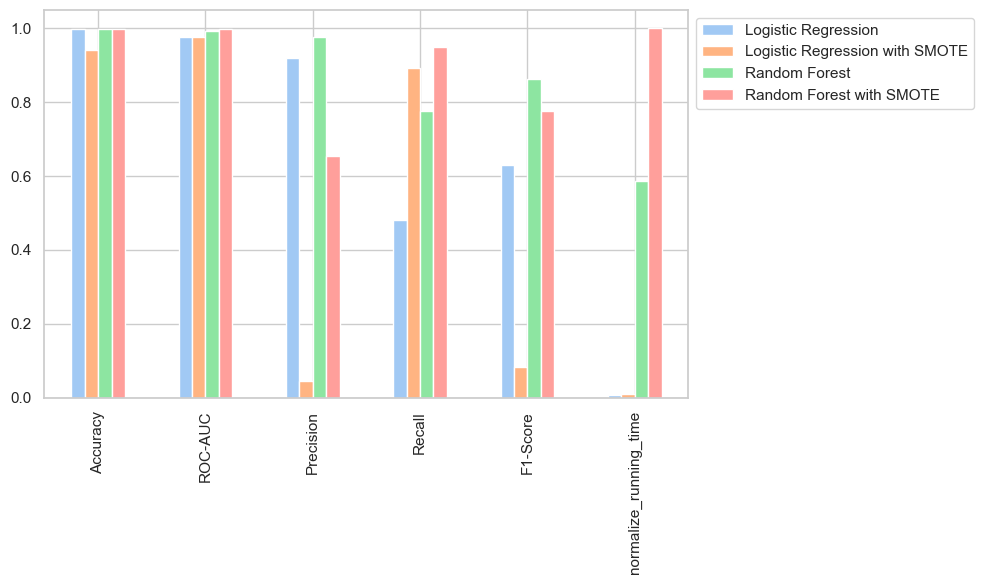

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results_df' is your DataFrame with the metrics
colors = sns.color_palette("pastel")

# Normalize running time
max_value = results_df['Running Time'].max()
temp = results_df.copy()
temp['normalize_running_time'] = temp['Running Time'] / max_value
temp.drop('Running Time', inplace=True, axis=1)
temp = temp.T

# Plot the bar chart
ax = temp.plot(kind='bar', figsize=(10, 6), color=colors)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside of the plot
plt.tight_layout()
plt.show()

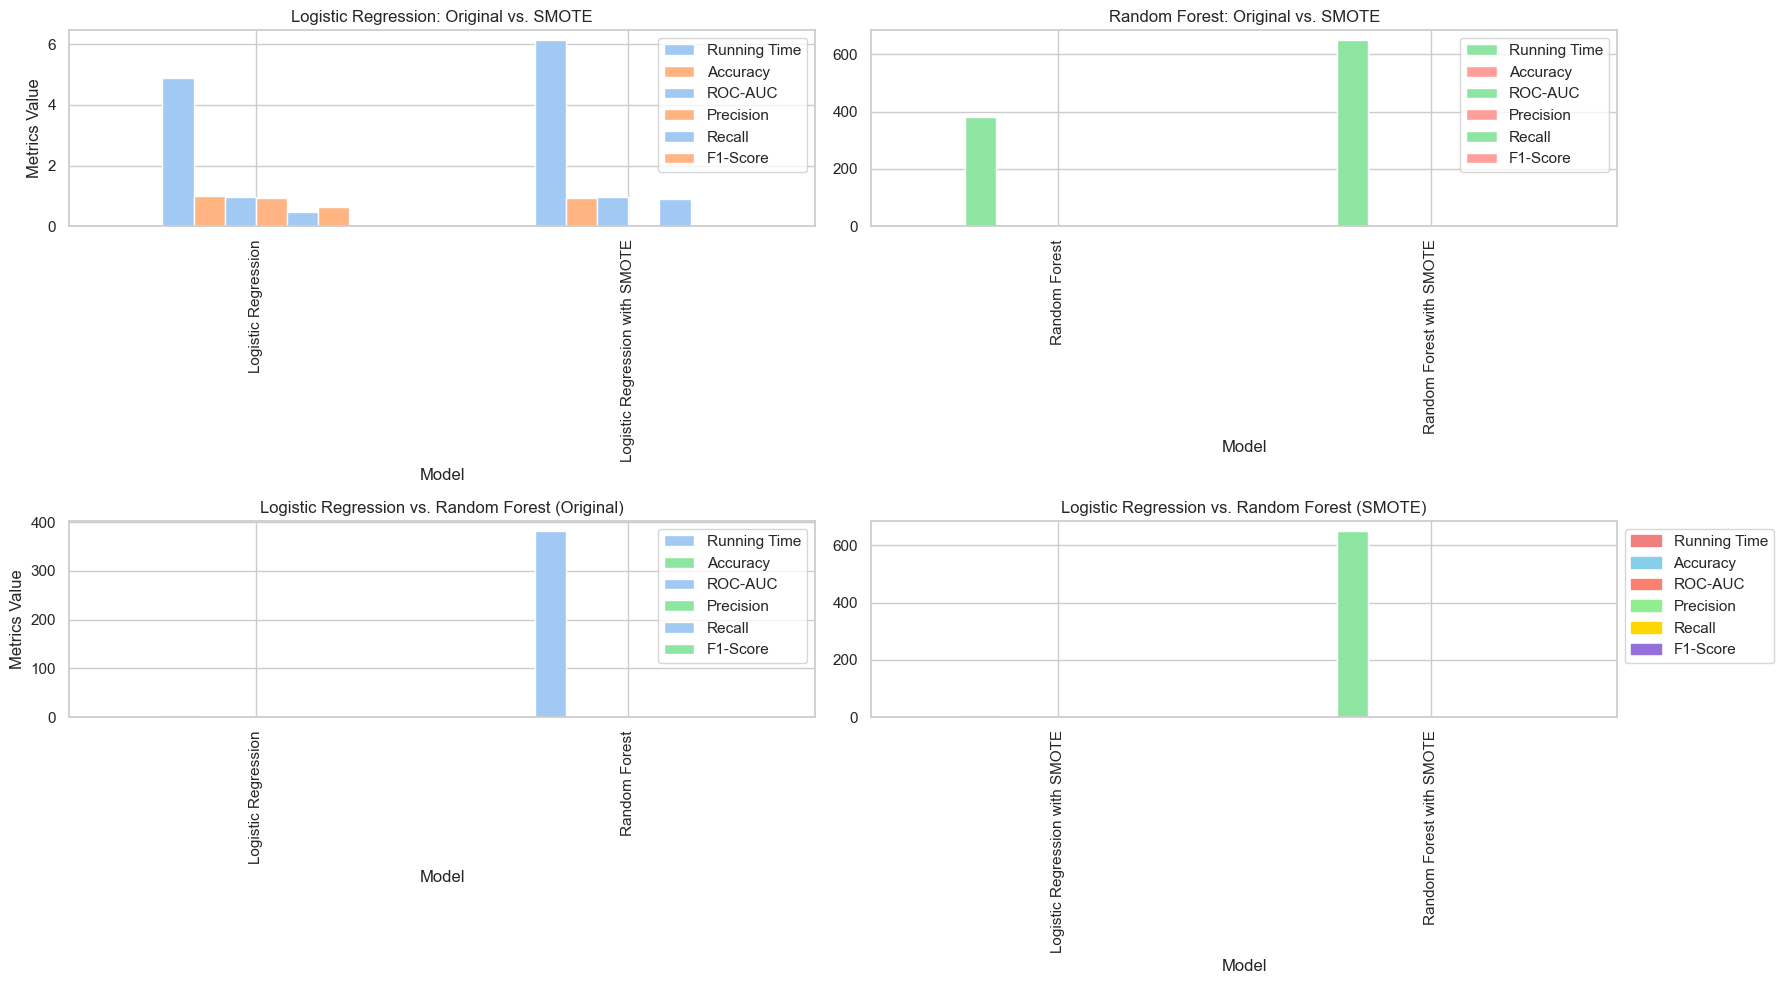

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results_df' is your DataFrame with the metrics
c = {
    'lr': '#a1c9f4',
    'lr_smote': '#ffb482',
    'rf': '#8de5a1',
    'rf_smote': '#ff9f9b',
}

# Create a color dictionary for the plot
colors = {
    'Logistic Regression': [c['lr'], c['lr_smote']],
    'Random Forest': [c['rf'], c['rf_smote']]
}

# Metrics colors
metrics_colors = {
    'Running Time': 'lightcoral',
    'Accuracy': 'skyblue',
    'ROC-AUC': 'salmon',
    'Precision': 'lightgreen',
    'Recall': 'gold',
    'F1-Score': 'mediumpurple'
}

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# 1. Comparing Logistic Regression model between normal and smote
results_df.loc[['Logistic Regression', 'Logistic Regression with SMOTE']].plot(kind='bar', color=colors['Logistic Regression'], ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression: Original vs. SMOTE")
axes[0, 0].set_ylabel("Metrics Value")

# 2. Compare Random Forest model between normal and smote
results_df.loc[['Random Forest', 'Random Forest with SMOTE']].plot(kind='bar', color=colors['Random Forest'], ax=axes[0, 1])
axes[0, 1].set_title("Random Forest: Original vs. SMOTE")

# 3. Compare Logistic Regression model and Random Forest model normal
results_df.loc[['Logistic Regression', 'Random Forest']].plot(kind='bar', color=[c['lr'], c['rf']], ax=axes[1, 0])
axes[1, 0].set_title("Logistic Regression vs. Random Forest (Original)")
axes[1, 0].set_ylabel("Metrics Value")

# 4. Compare Logistic Regression model and Random Forest model with smote
results_df.loc[['Logistic Regression with SMOTE', 'Random Forest with SMOTE']].plot(kind='bar', color=colors['Random Forest'], ax=axes[1, 1])
axes[1, 1].set_title("Logistic Regression vs. Random Forest (SMOTE)")

# Add legend for metrics colors
handles = [plt.Rectangle((0,0),1,1, color=metrics_colors[label]) for label in metrics_colors]
axes[1, 1].legend(handles, metrics_colors.keys(), loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


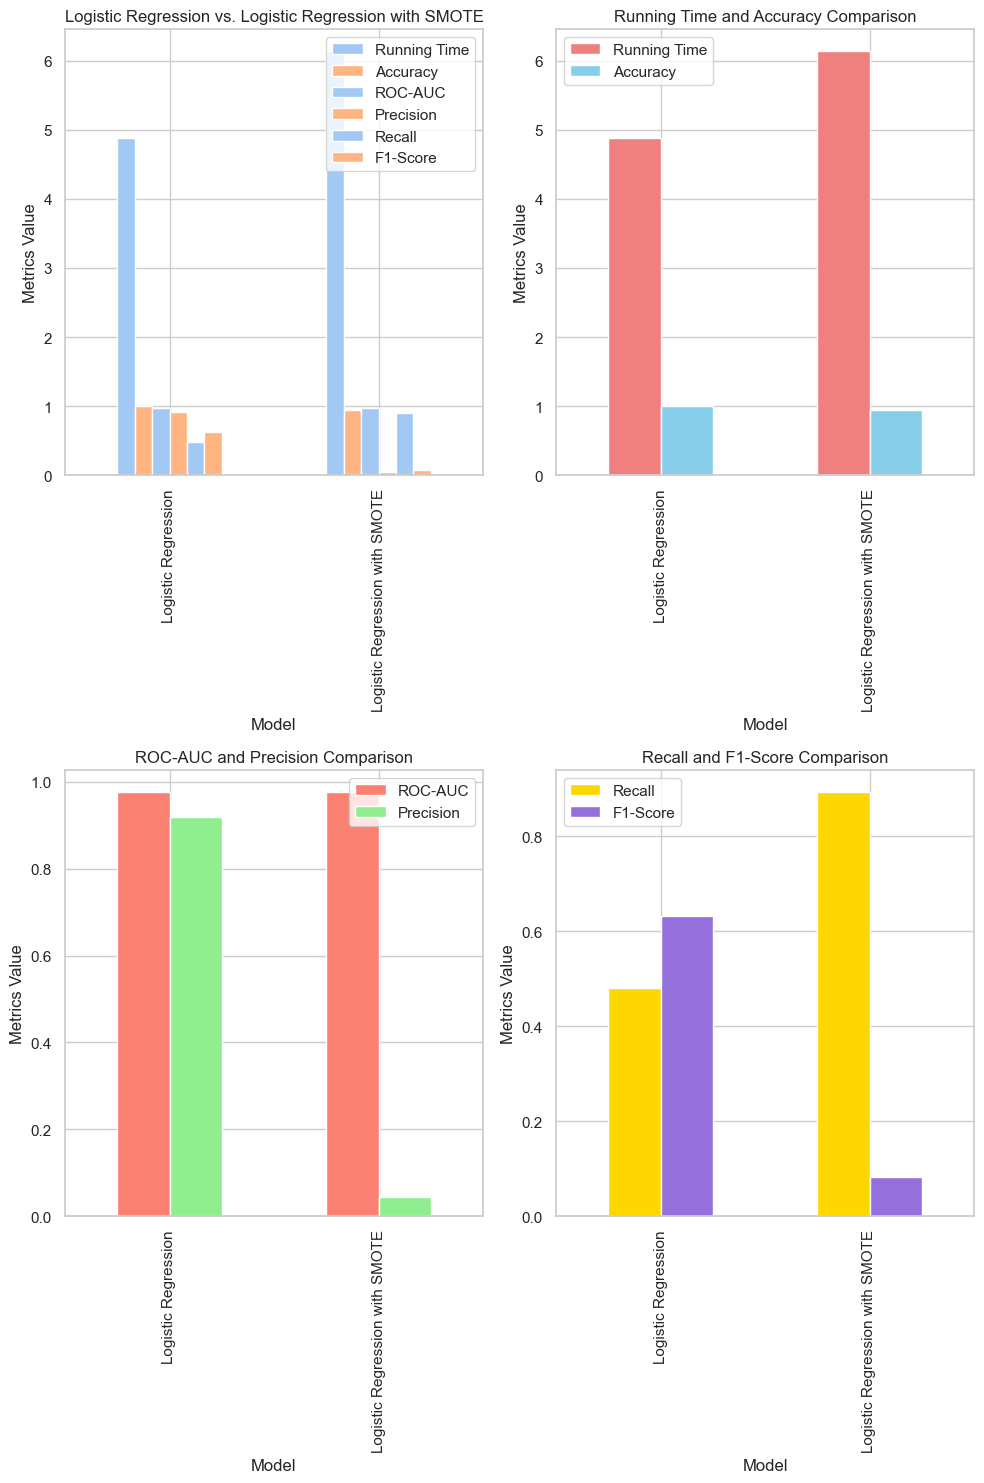

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results_df' is your DataFrame with the metrics
c = {
    'lr': '#a1c9f4',
    'lr_smote': '#ffb482',
}

# Metrics colors
metrics_colors = {
    'Running Time': 'lightcoral',
    'Accuracy': 'skyblue',
    'ROC-AUC': 'salmon',
    'Precision': 'lightgreen',
    'Recall': 'gold',
    'F1-Score': 'mediumpurple'
}

fig, axes = plt.subplots(2, 2, figsize=(10, 15))

# Comparing Logistic Regression model and Logistic Regression with SMOTE
results_df.loc[['Logistic Regression', 'Logistic Regression with SMOTE']].plot(kind='bar', color=[c['lr'], c['lr_smote']], ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression vs. Logistic Regression with SMOTE")
axes[0, 0].set_ylabel("Metrics Value")

# Compare Running Time and Accuracy
results_df.loc[['Logistic Regression', 'Logistic Regression with SMOTE']][['Running Time', 'Accuracy']].plot(kind='bar', color=[metrics_colors['Running Time'], metrics_colors['Accuracy']], ax=axes[0, 1])
axes[0, 1].set_title("Running Time and Accuracy Comparison")
axes[0, 1].set_ylabel("Metrics Value")

# Compare ROC-AUC and Precision
results_df.loc[['Logistic Regression', 'Logistic Regression with SMOTE']][['ROC-AUC', 'Precision']].plot(kind='bar', color=[metrics_colors['ROC-AUC'], metrics_colors['Precision']], ax=axes[1, 0])
axes[1, 0].set_title("ROC-AUC and Precision Comparison")
axes[1, 0].set_ylabel("Metrics Value")

# Compare Recall and F1-Score
results_df.loc[['Logistic Regression', 'Logistic Regression with SMOTE']][['Recall', 'F1-Score']].plot(kind='bar', color=[metrics_colors['Recall'], metrics_colors['F1-Score']], ax=axes[1, 1])
axes[1, 1].set_title("Recall and F1-Score Comparison")
axes[1, 1].set_ylabel("Metrics Value")

plt.tight_layout()
plt.show()


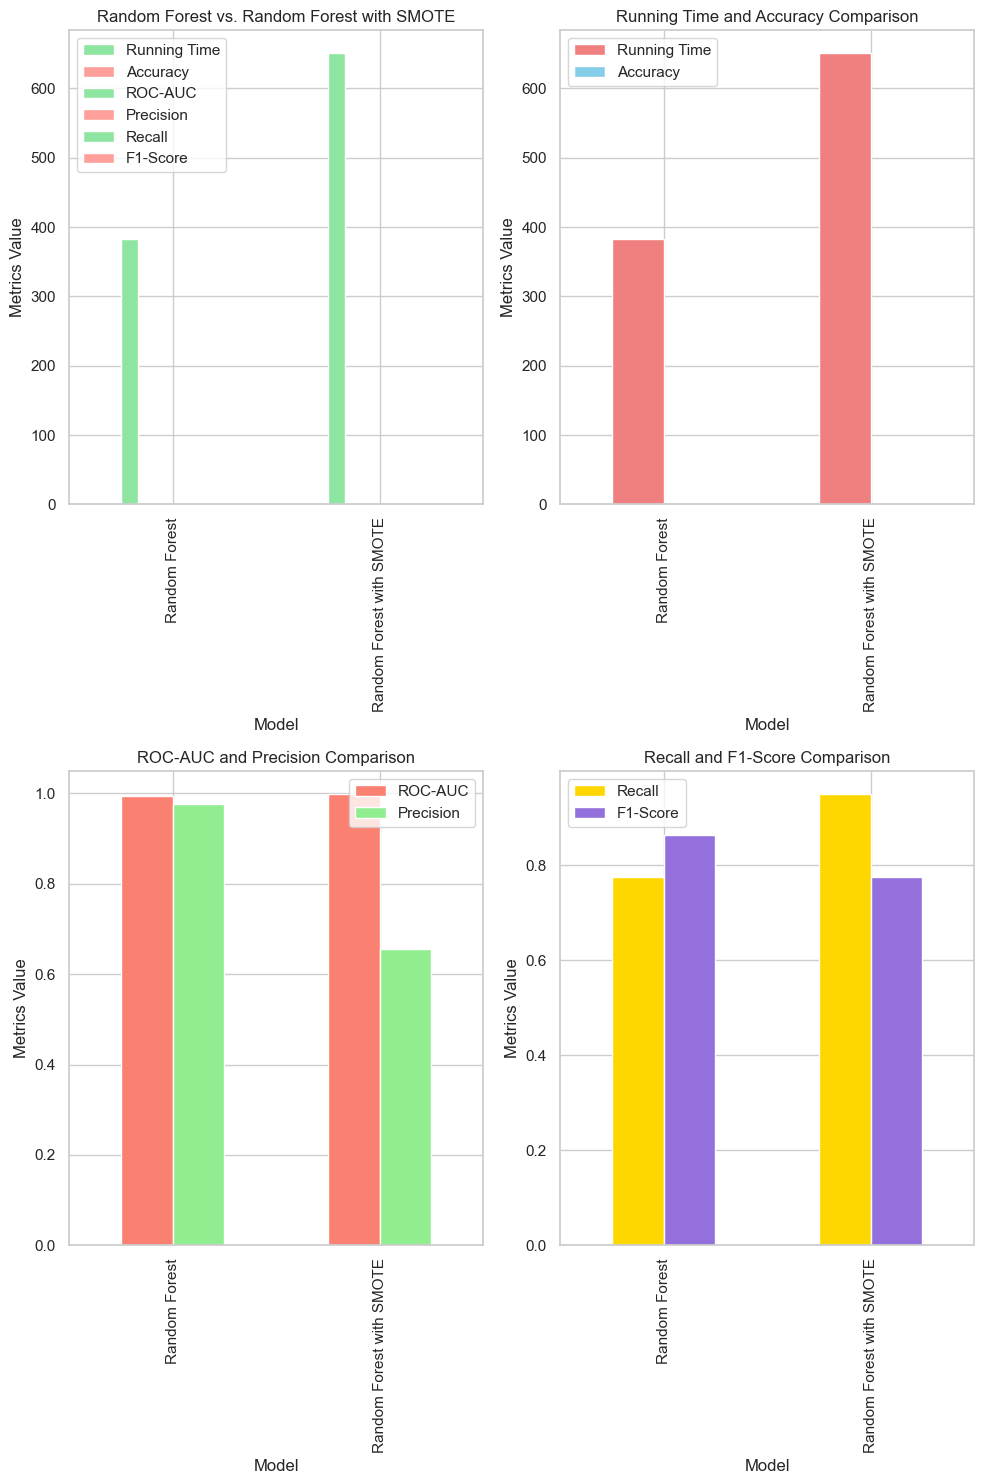

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results_df' is your DataFrame with the metrics
c = {
    'rf': '#8de5a1',
    'rf_smote': '#ff9f9b',
}

# Metrics colors
metrics_colors = {
    'Running Time': 'lightcoral',
    'Accuracy': 'skyblue',
    'ROC-AUC': 'salmon',
    'Precision': 'lightgreen',
    'Recall': 'gold',
    'F1-Score': 'mediumpurple'
}

fig, axes = plt.subplots(2, 2, figsize=(10, 15))

# Comparing Random Forest model and Random Forest with SMOTE
results_df.loc[['Random Forest', 'Random Forest with SMOTE']].plot(kind='bar', color=[c['rf'], c['rf_smote']], ax=axes[0, 0])
axes[0, 0].set_title("Random Forest vs. Random Forest with SMOTE")
axes[0, 0].set_ylabel("Metrics Value")

# Compare Running Time and Accuracy
results_df.loc[['Random Forest', 'Random Forest with SMOTE']][['Running Time', 'Accuracy']].plot(kind='bar', color=[metrics_colors['Running Time'], metrics_colors['Accuracy']], ax=axes[0, 1])
axes[0, 1].set_title("Running Time and Accuracy Comparison")
axes[0, 1].set_ylabel("Metrics Value")

# Compare ROC-AUC and Precision
results_df.loc[['Random Forest', 'Random Forest with SMOTE']][['ROC-AUC', 'Precision']].plot(kind='bar', color=[metrics_colors['ROC-AUC'], metrics_colors['Precision']], ax=axes[1, 0])
axes[1, 0].set_title("ROC-AUC and Precision Comparison")
axes[1, 0].set_ylabel("Metrics Value")

# Compare Recall and F1-Score
results_df.loc[['Random Forest', 'Random Forest with SMOTE']][['Recall', 'F1-Score']].plot(kind='bar', color=[metrics_colors['Recall'], metrics_colors['F1-Score']], ax=axes[1, 1])
axes[1, 1].set_title("Recall and F1-Score Comparison")
axes[1, 1].set_ylabel("Metrics Value")

plt.tight_layout()
plt.show()


In [69]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [70]:
import joblib

# Save the best KNN model to a file
joblib.dump(best_estimator_knn, 'best_knn_model.joblib')

# Load the saved model in your Streamlit app
loaded_model = joblib.load('best_knn_model.joblib')

In [78]:
joblib.dump(randfor_pipeline, 'randfor_pipeline_model.joblib')

['randfor_pipeline_model.joblib']

In [79]:
loaded_model = joblib.load('randfor_pipeline_model.joblib')

In [86]:

# Create a sample input data for testing
sample_input = pd.DataFrame({
    'amount': [0.0],
    'oldbalanceOrg': [0.0],
    'newbalanceOrig': [100.0],
    'type':['CASH_OUT'],
    'step':[3],
    'oldbalanceDest':[200.0],
    'newbalanceDest':[100.0]
})

# Make predictions using the loaded model
prediction = loaded_model.predict(sample_input)

# Display the prediction
if prediction[0] == 0:
    print("Potential Fraud Detected!")
else:
    print("No Fraud Detected.")

Potential Fraud Detected!


In [77]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('best_knn_model.joblib')

# Create a sample input data for testing
sample_input = pd.DataFrame({
    'amount': [1000.0],
    'oldbalanceOrg': [500.0],
    'newbalanceOrig': [1500.0],
    'type':['CASH_OUT'],
    'step':[3],
    'oldbalanceDest':[2500.0],
    'newbalanceDest':[1500.0]
})

# Make predictions using the loaded model
prediction = loaded_model.predict(sample_input)

# Display the prediction
if prediction[0] == 1:
    print("Potential Fraud Detected!")
else:
    print("No Fraud Detected.")


No Fraud Detected.
